In [1]:
# torch - CNN

In [2]:
# torch 패키지
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchsummary import summary

In [19]:
EPOCHS = 200
BATCH_SIZE = 64

In [4]:
torch.manual_seed(1)
import numpy as np
np.random.seed(1)

In [5]:
mean = [0.5,0.5,0.5]
std = [0.5,0.5,0.5]
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)    
])

In [6]:
# 학습용 데이터
train_loader = DataLoader(
    CIFAR10('cifar', train=True,download=True,transform = trans),
    batch_size= BATCH_SIZE,shuffle=True
)

val_loader = DataLoader(
    CIFAR10('cifar', train=False,download=True,transform = trans),
    batch_size = BATCH_SIZE,shuffle=True
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar/cifar-10-python.tar.gz to cifar
Files already downloaded and verified


In [7]:
# 토치에서 로더로부터 데이터 추출
image,label = next(iter(train_loader))
image.shape

torch.Size([64, 3, 32, 32])

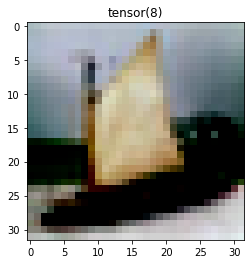

In [8]:
temp = np.transpose(image[0],(1,2,0))

# image[0].shape
plt.title(label[0])
plt.imshow(temp)

In [9]:
# 모델 
model = nn.Sequential(
    nn.Conv2d(3,6,kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(6,16,kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(576,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.Softmax(dim=1)
)

In [12]:
device = torch.device('cuda')
model = model.to(device)
summary(model, (3,32,32)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]             168
              ReLU-2            [-1, 6, 30, 30]               0
         MaxPool2d-3            [-1, 6, 15, 15]               0
            Conv2d-4           [-1, 16, 13, 13]             880
              ReLU-5           [-1, 16, 13, 13]               0
         MaxPool2d-6             [-1, 16, 6, 6]               0
           Flatten-7                  [-1, 576]               0
            Linear-8                   [-1, 64]          36,928
              ReLU-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
          Softmax-11                   [-1, 10]               0
Total params: 38,626
Trainable params: 38,626
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

In [14]:
# 손실함수
# 옵티마이져
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)
criterian = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm
for epoch in range(EPOCHS):
  for imgs,labels in tqdm(train_loader):
    imgs = imgs.to(device)
    labels = labels.to(device)
    outputs = model(imgs)
    # loss
    lossvalue = criterian(outputs, labels)
    #역전파
    optimizer.zero_grad()
    lossvalue.backward()
    optimizer.step()    
  print(f"epoch:{epoch} loss : {lossvalue:.4f}")


100%|██████████| 782/782 [00:14<00:00, 52.55it/s]


epoch:0 loss : 2.3987


 41%|████      | 320/782 [00:06<00:12, 37.70it/s]